# Data dictionary

# [Link to dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Variable Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">age</td>
    <td class="tg-7zrl">Edad del asegurado</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">sex</td>
    <td class="tg-7zrl">Género</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">bmi</td>
    <td class="tg-7zrl">Indice de masa corporal</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">children</td>
    <td class="tg-7zrl">Número de hijos</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">smoker</td>
    <td class="tg-7zrl">Indicador si fuma</td>
    <td class="tg-7zrl">Boolean</td>
  </tr>
  <tr>
    <td class="tg-7zrl">region</td>
    <td class="tg-7zrl">Región donde vive el asegurado</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">charges</td>
    <td class="tg-7zrl">Prima del seguro</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
</tbody></table>

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl # Often used with matplotlib, so kept
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting
import missingno as msno # For visualizing missing data

from sklearn.utils import shuffle
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error # Added mean_absolute_error
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from sklearn.decomposition import PCA # Ensure PCA is imported

import torch
import torch.nn as nn
import torch.optim as optim

%matplotlib inline

# Load Dataset

In [3]:
# reading data
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Split Dataset

In [4]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (1070, 7)
test shape: (268, 7)


# Data Visualization

## Basic information

In [5]:
train.head()

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


In [6]:
train.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,13346.089736
std,14.073960,6.043386,1.215983,12019.510778
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.205000,0.000000,4897.667387
50%,39.500000,30.210000,1.000000,9575.442100
75%,51.000000,34.496250,2.000000,16746.657400
max,64.000000,53.130000,5.000000,62592.873090


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


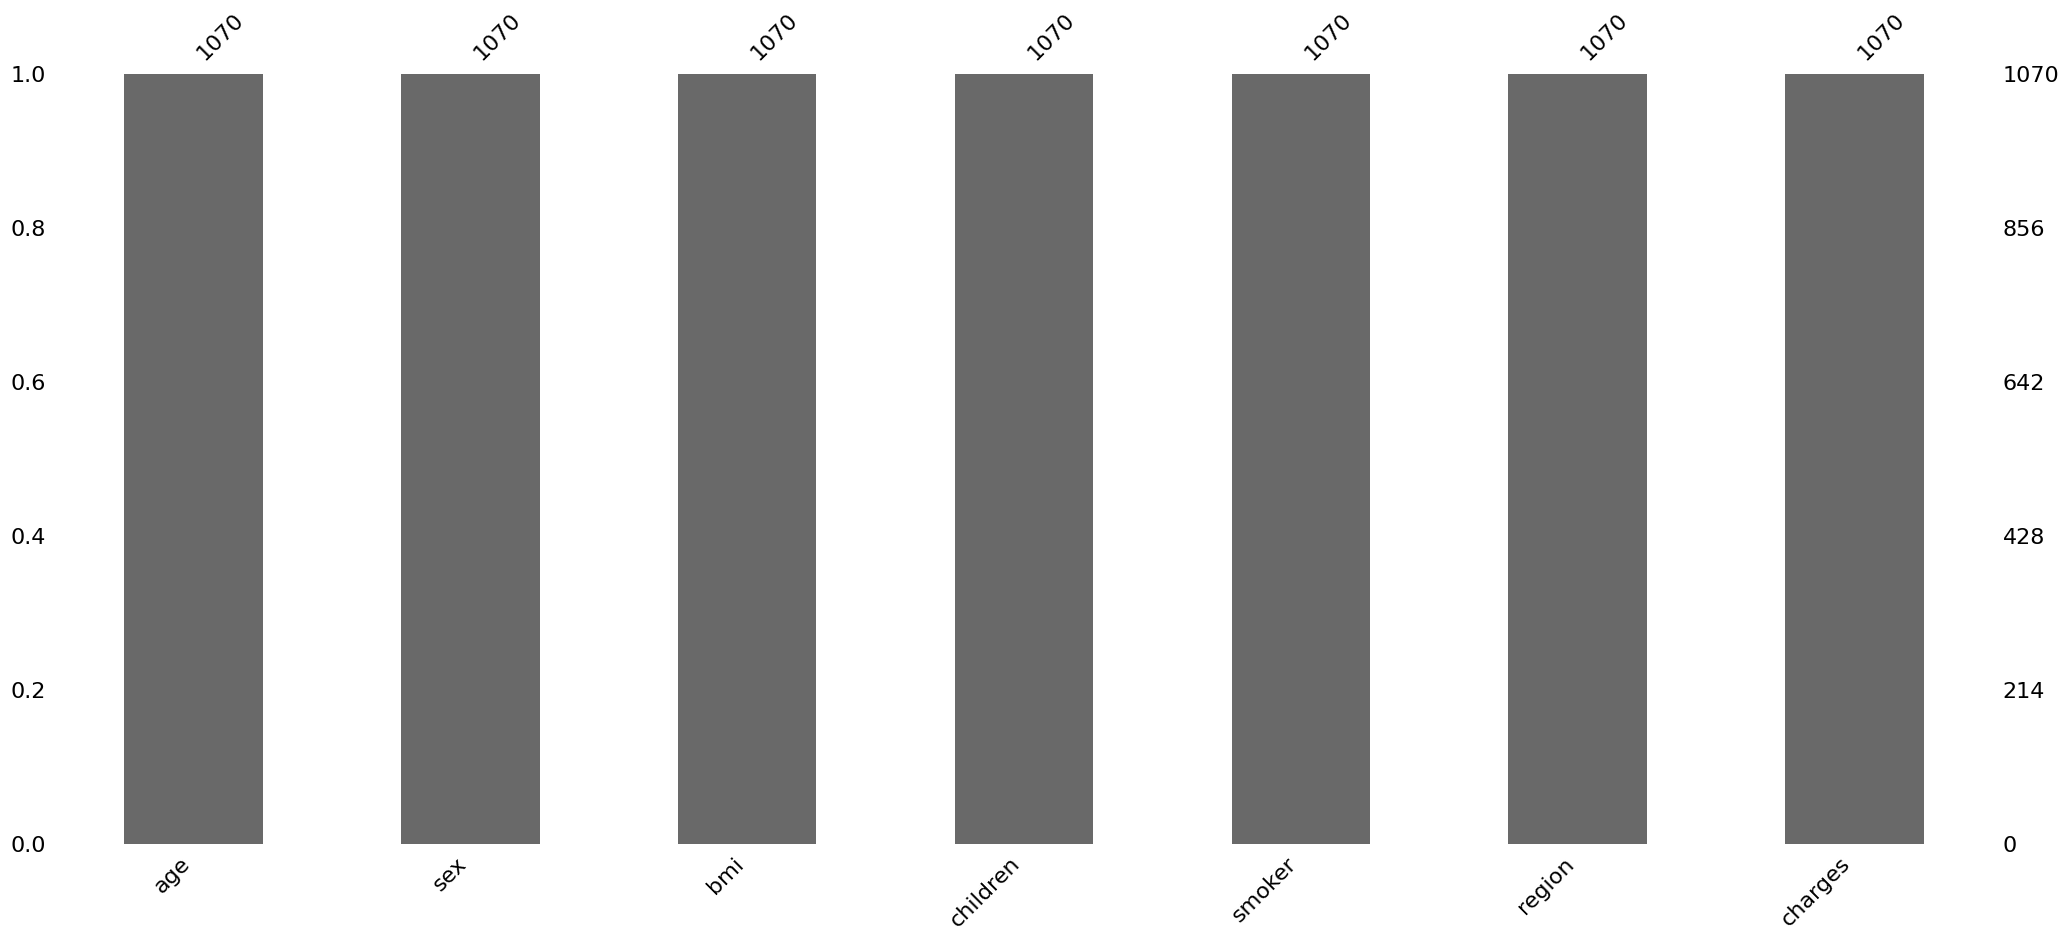

In [8]:
# looking for missing values
msno.bar(train)
plt.show()

In [9]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


## Correlation analysis

In [12]:
# --- Preprocess Categorical Variables for numerical representation ---
# For Spearman's, we still need numerical values.
# Binary categorical variables can be mapped to 0/1.
# Multi-category nominal variables are best handled with one-hot encoding.

# Create a copy to avoid modifying the original DataFrame directly
df_processed = train.copy()

# Map 'sex' to numerical (e.g., female=0, male=1)
# Assuming 'female' and 'male' are the only values.
# If 'sex' was purely 'female' in the sample, this mapping might not show variance.
# For demonstration, we'll include it.
df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})

# Map 'smoker' to numerical (no=0, yes=1)
df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode 'region' as it's a nominal categorical variable with multiple categories
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

# --- Calculate the Spearman Correlation Matrix ---
# Specify method='spearman'
spearman_correlation_matrix = df_processed.corr(method='spearman')

print("Spearman Correlation Matrix:")
spearman_correlation_matrix

Spearman Correlation Matrix:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.007514,0.115408,0.074915,-0.052136,0.509846,0.016374,-0.019407,0.025868
sex,-0.007514,1.000000,0.013138,0.015945,0.070908,0.010859,0.017047,-0.008217,-0.013911
bmi,0.115408,0.013138,1.000000,0.001815,-0.000910,0.126142,-0.103393,0.227545,0.016553
children,0.074915,0.015945,0.001815,1.000000,0.023610,0.133833,0.044798,-0.023379,-0.009604
smoker,-0.052136,0.070908,-0.000910,0.023610,1.000000,0.661788,-0.030547,0.051450,-0.033688
charges,0.509846,0.010859,0.126142,0.133833,0.661788,1.000000,-0.009979,0.013010,-0.041507
region_northwest,0.016374,0.017047,-0.103393,0.044798,-0.030547,-0.009979,1.000000,-0.336290,-0.320954
region_southeast,-0.019407,-0.008217,0.227545,-0.023379,0.051450,0.013010,-0.336290,1.000000,-0.343194
region_southwest,0.025868,-0.013911,0.016553,-0.009604,-0.033688,-0.041507,-0.320954,-0.343194,1.000000


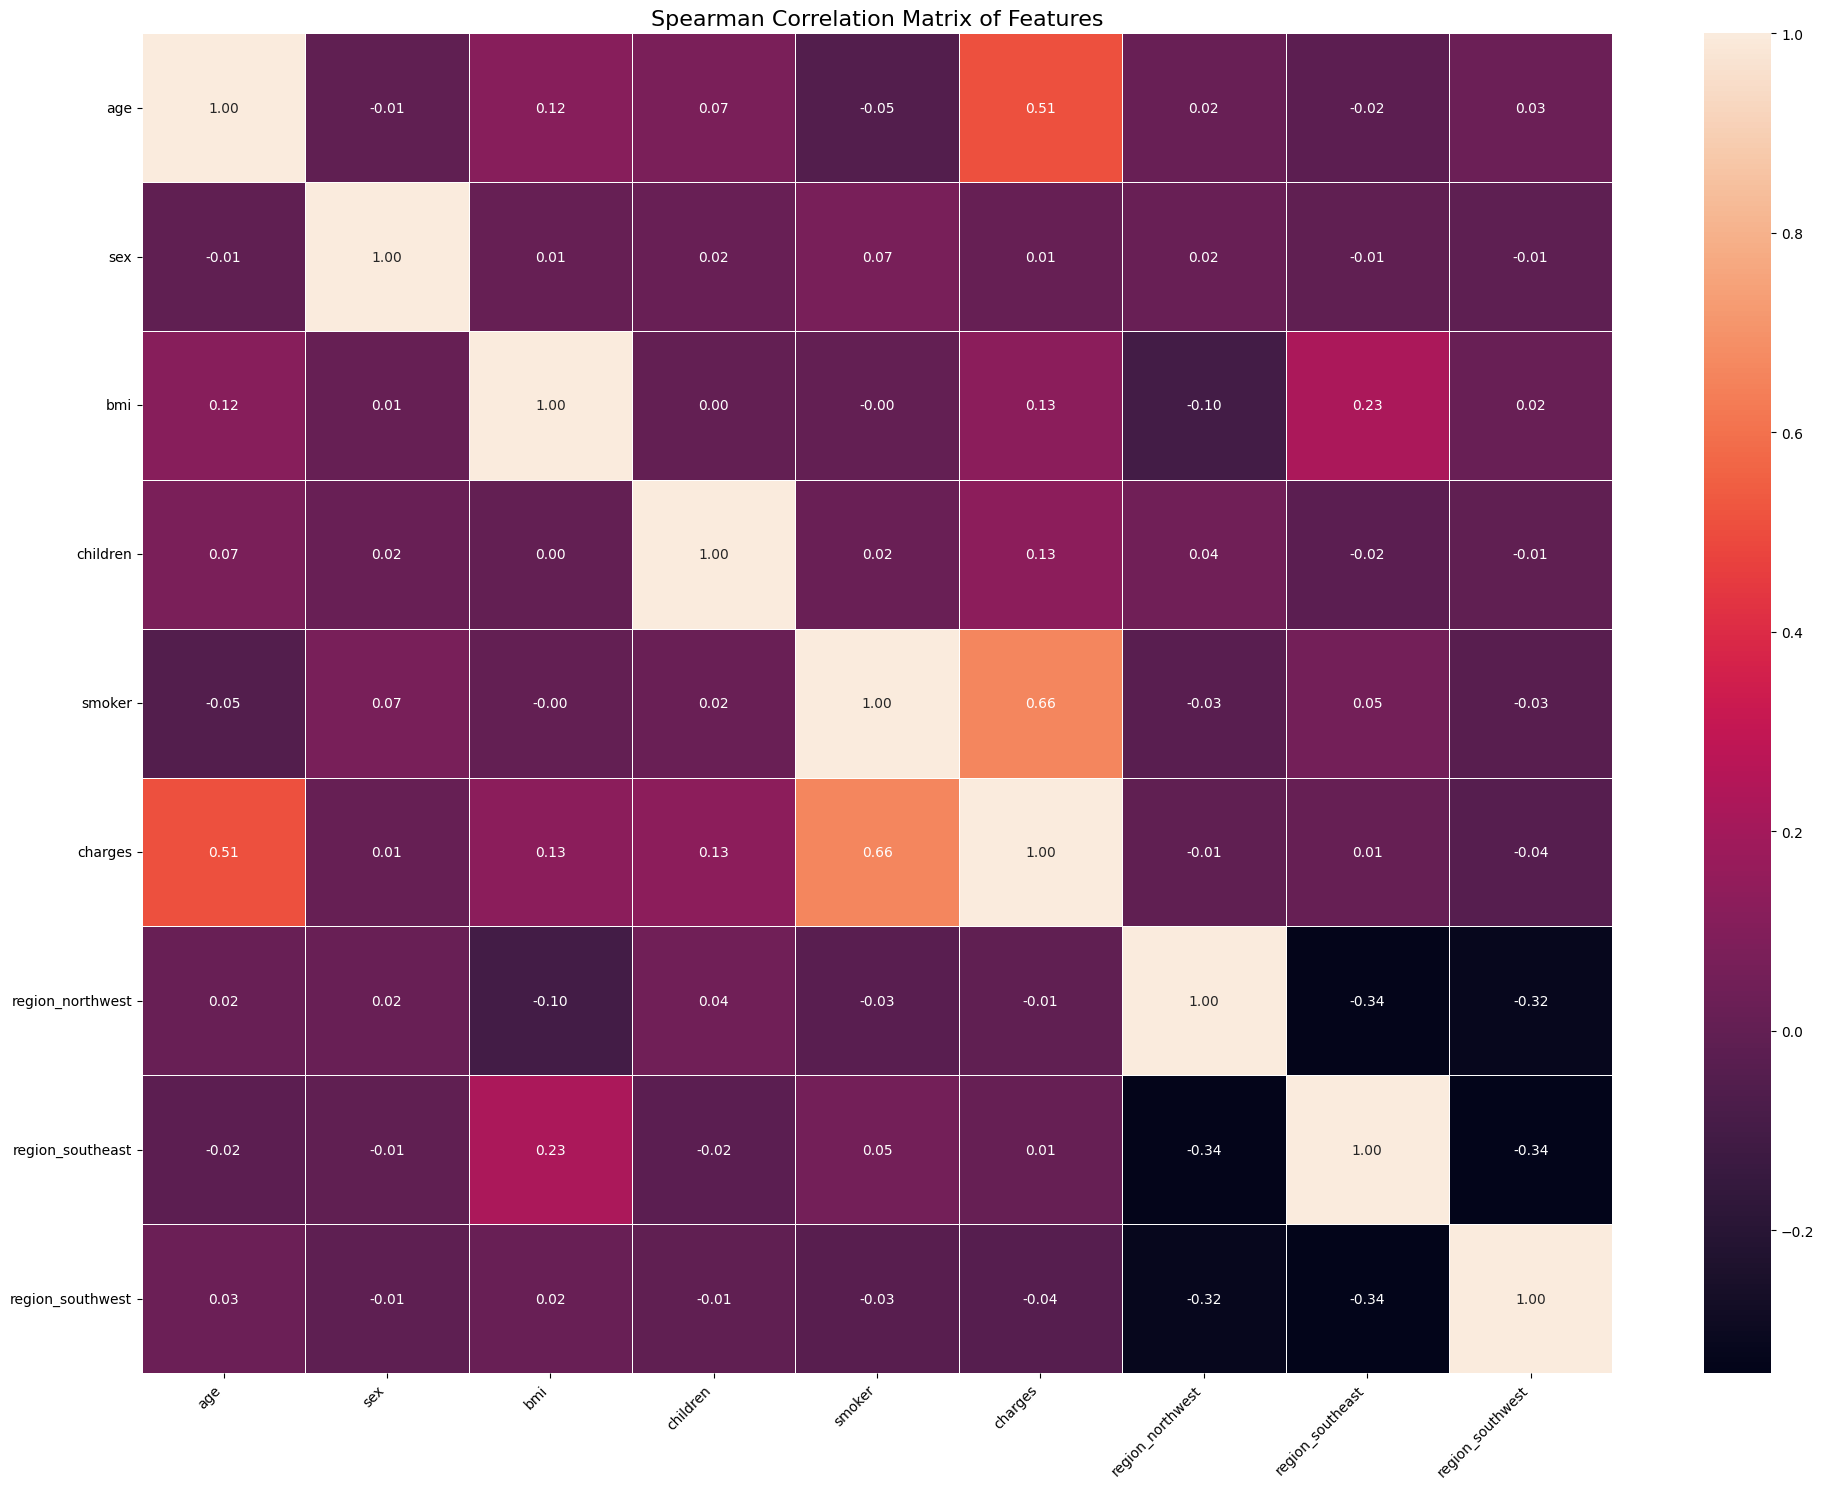


--- Interpretation of Spearman's Correlation ---
• Spearman's correlation coefficient ranges from -1 to 1.
• A value of 1 indicates a perfect monotonic increasing relationship (as one variable increases, the other also increases, but not necessarily at a constant rate).
• A value of -1 indicates a perfect monotonic decreasing relationship (as one variable increases, the other decreases).
• A value of 0 indicates no monotonic relationship.
• It's based on the ranks of the data values, not the raw values themselves, making it less sensitive to outliers and suitable for non-normally distributed data or ordinal scales.


In [13]:
# --- Visualize the Spearman Correlation Matrix using a Heatmap ---
plt.figure(figsize=(20, 15)) # Set the figure size for better readability
sns.heatmap(
    spearman_correlation_matrix,
    annot=True,      # Show the correlation values on the heatmap
    cmap='rocket',   # Colormap (e.g., 'viridis', 'plasma', 'magma', 'coolwarm')
    fmt=".2f",       # Format annotations to two decimal places
    linewidths=.5    # Add lines between cells
)
plt.title('Spearman Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n--- Interpretation of Spearman's Correlation ---")
print("• Spearman's correlation coefficient ranges from -1 to 1.")
print("• A value of 1 indicates a perfect monotonic increasing relationship (as one variable increases, the other also increases, but not necessarily at a constant rate).")
print("• A value of -1 indicates a perfect monotonic decreasing relationship (as one variable increases, the other decreases).")
print("• A value of 0 indicates no monotonic relationship.")
print("• It's based on the ranks of the data values, not the raw values themselves, making it less sensitive to outliers and suitable for non-normally distributed data or ordinal scales.")

## Distribution plot of target label


--- Distribution Plot of Charges ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


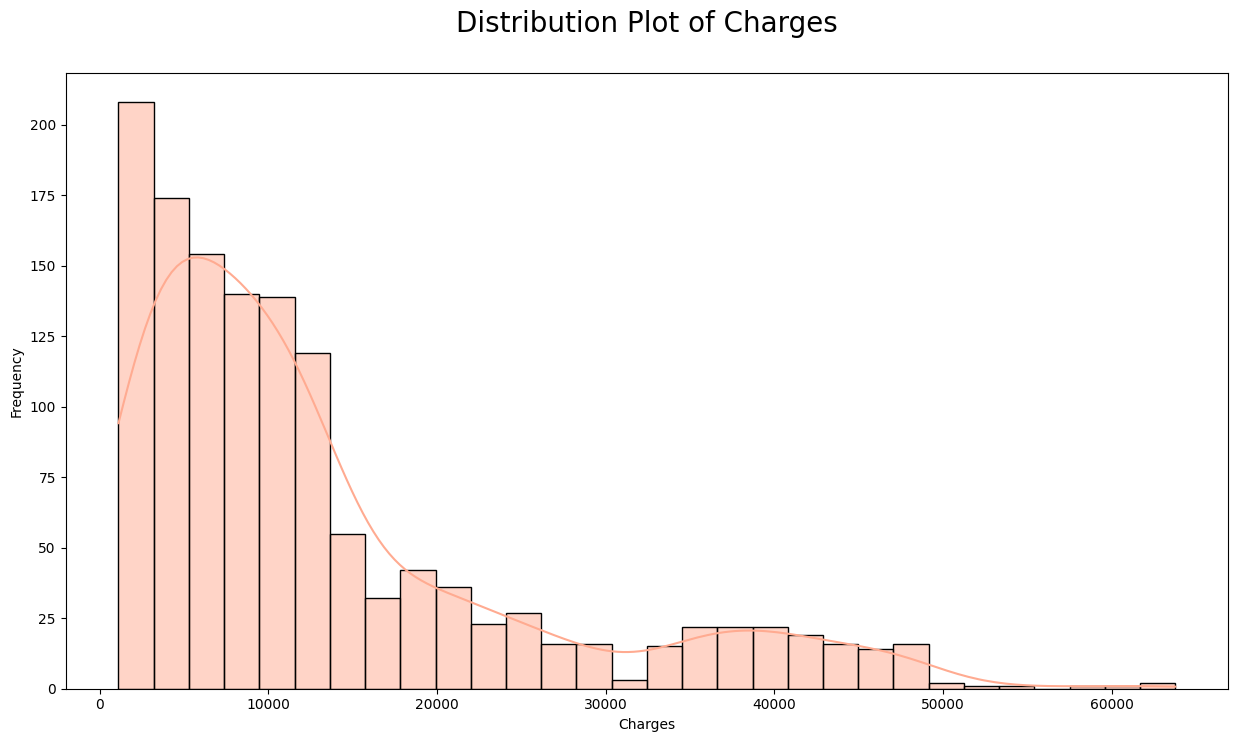

In [14]:
# --- Distribution plot of charges column ---
print("\n--- Distribution Plot of Charges ---")
plt.figure(figsize = (15, 8))
sns.histplot(df['charges'], kde=True, color='#FFAB91') # Using histplot with kde=True for distribution
plt.title('Distribution Plot of Charges\n', fontsize = 20)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


--- Distribution Plot of Charges (Seaborn) ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

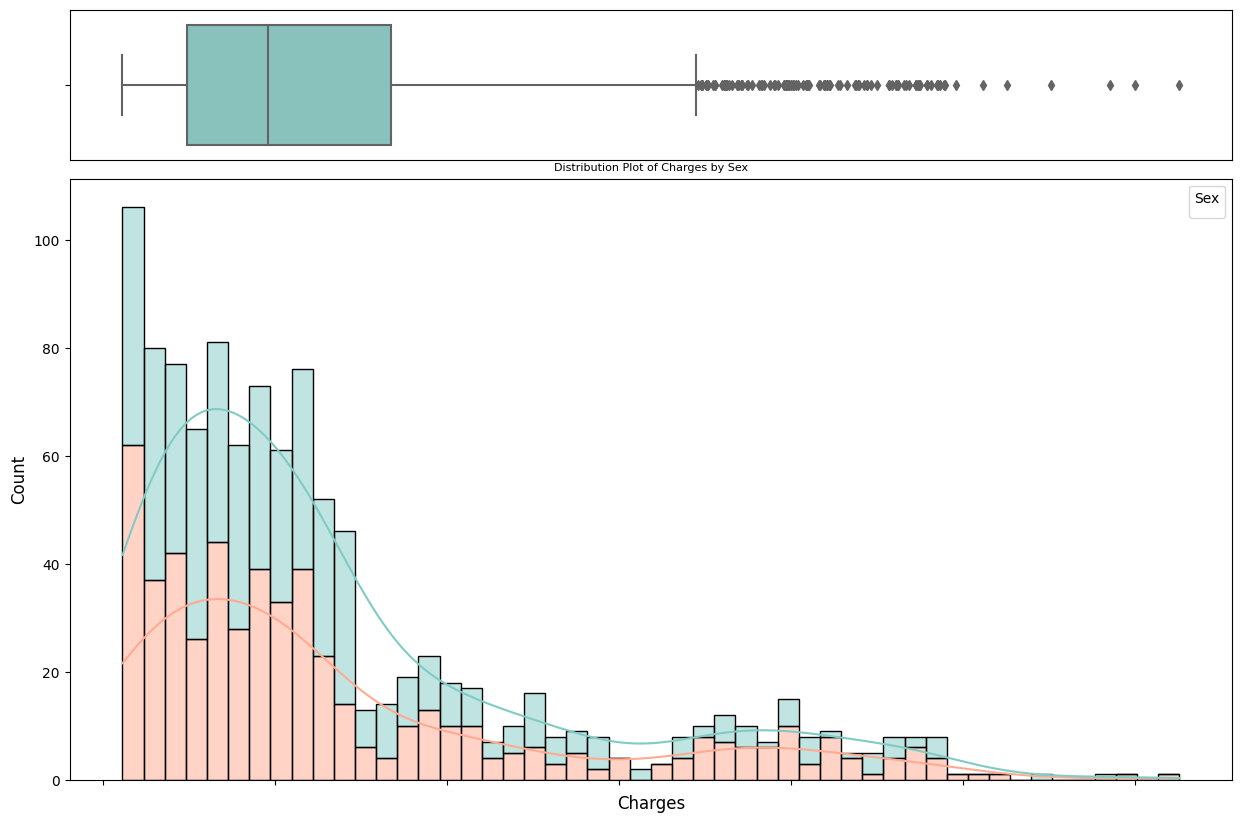

In [15]:
# --- Distribution plot of charges column using Seaborn (replacing Plotly Express) ---
print("\n--- Distribution Plot of Charges (Seaborn) ---")

# Create a figure and a set of subplots using gridspec for a combined plot
fig = plt.figure(figsize=(15, 10)) # Adjusted figure size for better layout as per user's request
gs = fig.add_gridspec(2, 1, height_ratios=[0.2, 0.8], hspace=0.05) # 2 rows, 1 column, top row smaller

ax_box = fig.add_subplot(gs[0, 0]) # Top subplot for box plot
ax_hist = fig.add_subplot(gs[1, 0], sharex=ax_box) # Bottom subplot for histogram, sharing x-axis

# Define a custom palette with the specified hex color codes (light teal/mint and salmon/peach)
custom_palette = ["#80CBC4", "#FFAB91"] # These hex codes approximate the colors in your provided images

# Plot marginal box plot, colored by 'sex'
sns.boxplot(data=train, x='charges', hue='sex', ax=ax_box, palette=custom_palette)
ax_box.set(xlabel='', xticklabels=[]) # Remove x-axis label and ticks for the box plot
ax_box.tick_params(axis='x', bottom=False) # Remove bottom ticks

# Plot histogram, colored by 'sex' and stacked
sns.histplot(data=train, x='charges', hue='sex', multiple='stack', kde=True, bins=50, ax=ax_hist, palette=custom_palette)
ax_hist.set_title('Distribution Plot of Charges by Sex', fontsize=8) # Title font size updated to 16 for visibility
ax_hist.set_xlabel('Charges', fontsize=12)
ax_hist.set_ylabel('Count', fontsize=12)
ax_hist.legend(title='Sex') # The legend clearly labels the 'sex' categories

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [16]:
train['smoker'].unique()

array(['no', 'yes'], dtype=object)

# Freature Engineer

In [17]:
train = train.drop(columns=['sex', 'region'], errors='ignore')
test = test.drop(columns=['sex', 'region'], errors='ignore')
train.head()

,age,bmi,children,smoker,charges
560,46,19.95,2,no,9193.83850
1285,47,24.32,0,no,8534.67180
1142,52,24.86,0,no,27117.99378
969,39,34.32,5,no,8596.82780
486,54,21.47,3,no,12475.35130


## Encode categorical column and Normalization

In [18]:
# --- Initialize the OneHotEncoder ---
# handle_unknown='ignore' will set unseen categories to all zeros, preventing errors.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False returns a dense array

# --- Fit the encoder on the 'smoker' column of the TRAINING data only ---
# fit on train_df[['smoker']] (note the double brackets to keep it as a DataFrame)
encoder.fit(train[['smoker']])

# --- Transform the 'smoker' column in both TRAINING and TEST datasets ---

# Transform training data
smoker_encoded_train = encoder.transform(train[['smoker']])
# Create a DataFrame from the encoded array with appropriate column names
# encoder.get_feature_names_out() provides names like 'smoker_no', 'smoker_yes'
smoker_df_train = pd.DataFrame(smoker_encoded_train, columns=encoder.get_feature_names_out(['smoker']), index=train.index)

# Transform test data
smoker_encoded_test = encoder.transform(test[['smoker']])
# Create a DataFrame from the encoded array with appropriate column names
smoker_df_test = pd.DataFrame(smoker_encoded_test, columns=encoder.get_feature_names_out(['smoker']), index=test.index)

# --- Drop the original 'smoker' column and concatenate the new encoded columns ---

# For training data
train = train.drop('smoker', axis=1)
train = pd.concat([train, smoker_df_train], axis=1)

# For test data
test = test.drop('smoker', axis=1)
test = pd.concat([test, smoker_df_test], axis=1)

# --- Standard Scale numerical columns ---
# Identify numerical columns (excluding the newly created smoker_no/smoker_yes and the target 'charges')
numerical_cols = ['age', 'bmi', 'children'] # Assuming these are your numerical features

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the TRAINING data only
scaler.fit(train[numerical_cols])

# Define y_scaler if not already defined
y_scaler = StandardScaler()
y_scaler.fit(train[['charges']])  # Fit only on the charges column
train['charges'] = y_scaler.transform(train[['charges']])
test['charges'] = y_scaler.transform(test[['charges']])
# Transform numerical columns in both TRAINING and TEST datasets
train[numerical_cols] = scaler.transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
train

,age,bmi,children,charges,smoker_no,smoker_yes
560,0.472227,-1.756525,0.734336,-0.345621,1.0,0.0
1285,0.543313,-1.033082,-0.911192,-0.400488,1.0,0.0
1142,0.898745,-0.943687,-0.911192,1.146332,1.0,0.0
969,-0.025379,0.622393,3.202629,-0.395314,1.0,0.0
486,1.040918,-1.504893,1.557100,-0.072478,1.0,0.0
...,...,...,...,...,...,...
1095,-1.518194,0.130717,2.379865,-0.731229,1.0,0.0
1130,-0.025379,-1.107579,3.202629,-0.396523,1.0,0.0
1294,1.325264,-0.891539,-0.911192,-0.117777,1.0,0.0
860,-0.167551,2.820864,0.734336,2.727461,0.0,1.0


## Split features and target label

In [19]:
x_train = train.drop('charges', axis=1) 
y_train = train['charges'] 
x_test = test.drop('charges', axis=1) 
y_test = test['charges'] 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 5)
y_train shape: (1070,)
X_test shape: (268, 5)
y_test shape: (268,)


## Dimensionality reduction

In [20]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

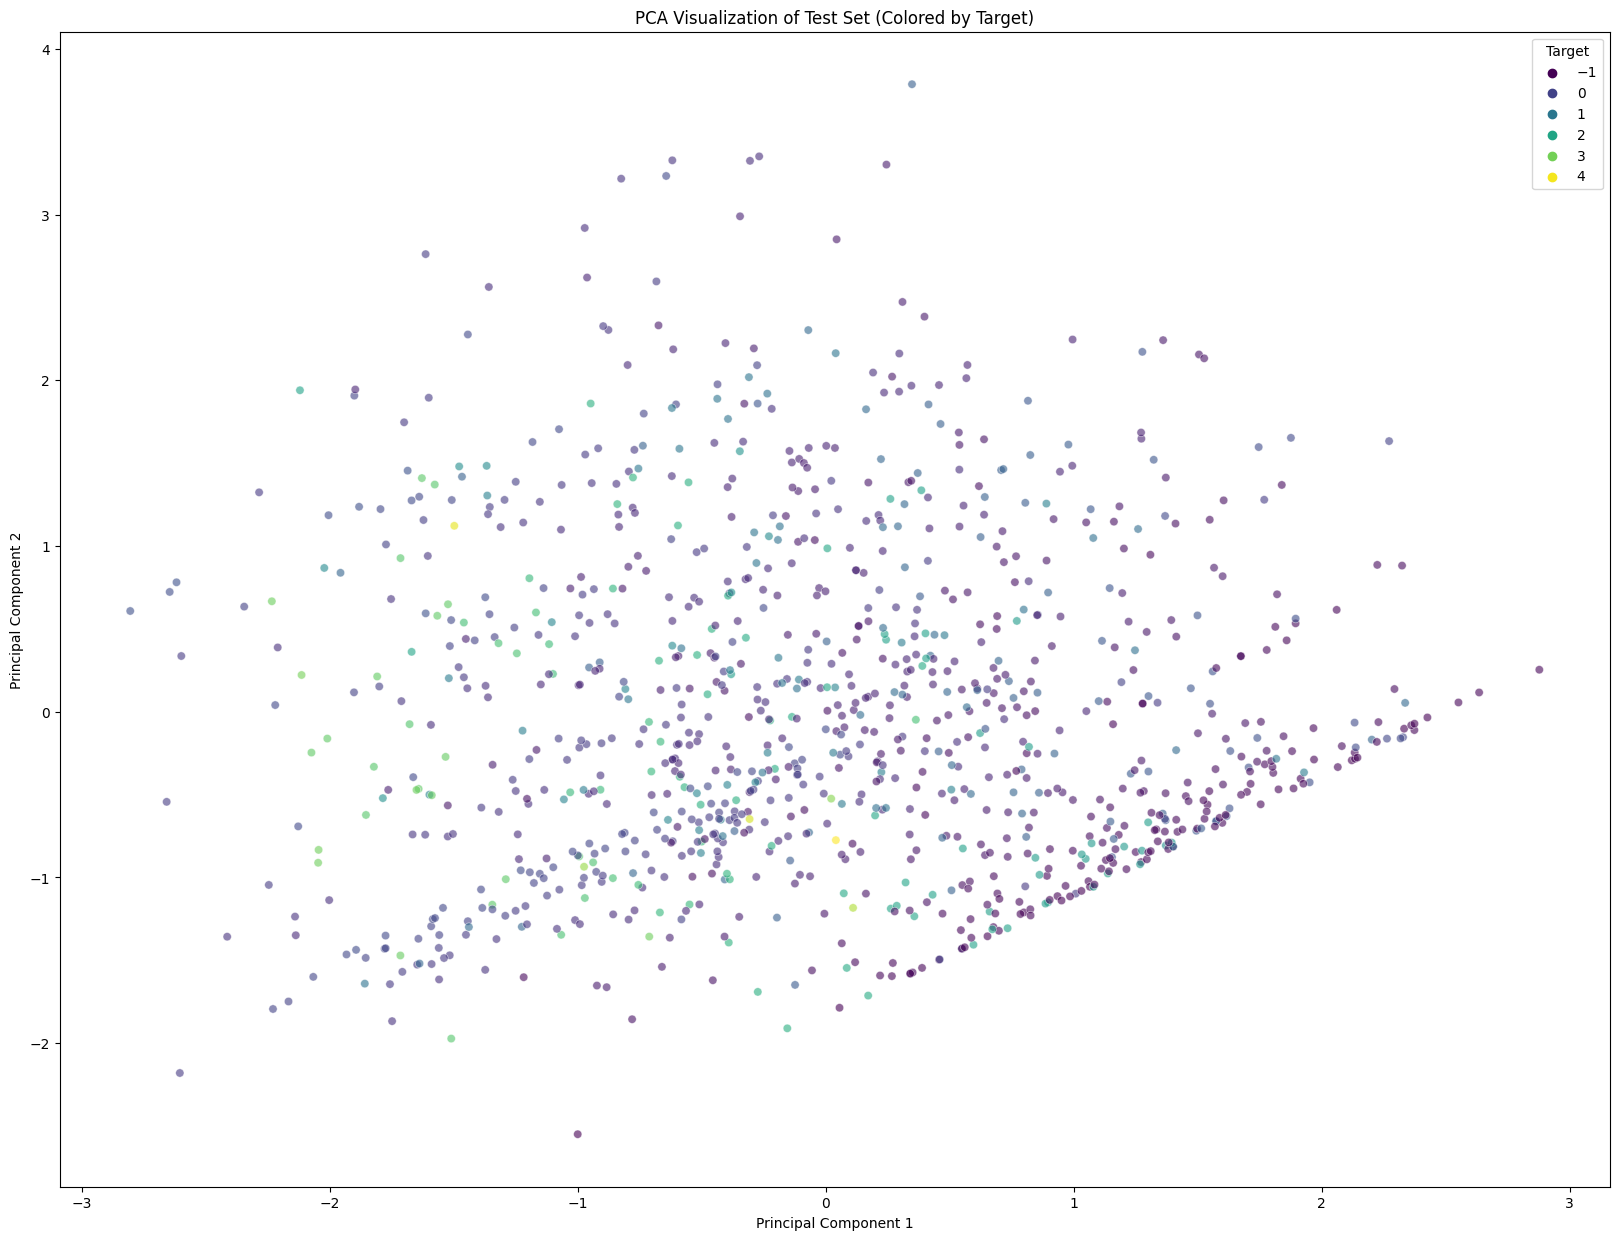

In [21]:
# --- Visualize the PCA-transformed data ---

# Create a DataFrame for the test set PCA components
plot_data = pd.DataFrame({
    'PC1': x_train[:, 0],  # First principal component
    'PC2': x_train[:, 1],  # Second principal component
    'Target': y_train         # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., charges)
    palette="viridis",  # Continuous palette for charges
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Test Set (Colored by Target)")

# Optionally add a regression line (if desired)
# sns.regplot(data=plot_data, x="PC1", y="PC2", scatter=False, color="blue")

# Show the plot
plt.show()

# Modeling

## Model Architecture, model building (PyTorch), and model training

In [22]:
# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32) # Use scaled y_train

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_tensor, y_train_tensor, test_size=0.2, random_state=42
)

train_loss_history = []
val_loss_history = []

# --- Define the MLP Model using PyTorch's nn.Module (for Regression) ---
class MLPModel(nn.Module): # Renamed to MLPModel
    """
    A Multi-Layer Perceptron model implemented using PyTorch's nn.Module for REGRESSION.
    It consists of an input layer, a hidden layer with ReLU activation, and an output layer.
    """
    def __init__(self, input_dim, hidden_dim):
        """
        Initializes the MLPModel.

        Args:
            input_dim (int): The number of input features for the model.
            hidden_dim (int): The number of neurons in the hidden layer.
        """
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) # First fully connected layer
        self.relu = nn.ReLU() # ReLU activation function
        self.fc2 = nn.Linear(hidden_dim, 1) # Output layer for regression (single continuous output)

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Args:
            x (torch.Tensor): The input tensor to the model.

        Returns:
            torch.Tensor: The output tensor after applying the linear transformation.
        """
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
input_dim = x_train.shape[1]
hidden_dim = 64 # You can experiment with this value
model = MLPModel(input_dim, hidden_dim) # Use MLPModel

print("\n--- Model Architecture ---")
print(model)
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Number of trainable parameters: {total_params}")

# --- Define Loss Function and Optimizer (for Regression) ---
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # Slightly reduced learning rate, good starting point

# --- Implement Early Stopping ---
early_stopping_patience = 8
best_val_loss = float('inf')
patience_counter = 0
best_model_state = None


# --- Train the Model ---
epochs = 100
print("\n--- Training Model ---")
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_split)
    loss = criterion(outputs, y_train_split)
    loss.backward()
    optimizer.step()

    # --- Validation step ---
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_val_split)
        val_loss = criterion(val_outputs, y_val_split)

    train_loss_history.append(loss.item())
    val_loss_history.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Train Loss: {loss.item():.4f}, "
          f"Validation Loss: {val_loss.item():.4f}")

    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        patience_counter = 0
        best_model_state = model.state_dict()
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch+1}. Restoring best weights.")
            model.load_state_dict(best_model_state)
            break

print("\nTraining complete.")


--- Model Architecture ---
MLPModel(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)
Number of trainable parameters: 257

--- Training Model ---
Epoch 1/100, Train Loss: 1.0840, Validation Loss: 1.1921
Epoch 2/100, Train Loss: 1.0710, Validation Loss: 1.1816
Epoch 3/100, Train Loss: 1.0589, Validation Loss: 1.1719
Epoch 4/100, Train Loss: 1.0477, Validation Loss: 1.1631
Epoch 5/100, Train Loss: 1.0374, Validation Loss: 1.1551
Epoch 6/100, Train Loss: 1.0279, Validation Loss: 1.1478
Epoch 7/100, Train Loss: 1.0194, Validation Loss: 1.1414
Epoch 8/100, Train Loss: 1.0117, Validation Loss: 1.1357
Epoch 9/100, Train Loss: 1.0049, Validation Loss: 1.1307
Epoch 10/100, Train Loss: 0.9989, Validation Loss: 1.1264
Epoch 11/100, Train Loss: 0.9937, Validation Loss: 1.1228
Epoch 12/100, Train Loss: 0.9893, Validation Loss: 1.1198
Epoch 13/100, Train Loss: 0.9855, Validation Loss: 1.1174
Epoch 14/100, Train 

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([856])) that is different to the input size (torch.Size([856, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([214])) that is different to the input size (torch.Size([214, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 19/100, Train Loss: 0.9751, Validation Loss: 1.1118
Epoch 20/100, Train Loss: 0.9747, Validation Loss: 1.1119
Epoch 21/100, Train Loss: 0.9747, Validation Loss: 1.1122
Epoch 22/100, Train Loss: 0.9748, Validation Loss: 1.1125
Epoch 23/100, Train Loss: 0.9751, Validation Loss: 1.1130
Epoch 24/100, Train Loss: 0.9754, Validation Loss: 1.1134
Epoch 25/100, Train Loss: 0.9758, Validation Loss: 1.1138
Epoch 26/100, Train Loss: 0.9761, Validation Loss: 1.1142
Epoch 27/100, Train Loss: 0.9765, Validation Loss: 1.1146
Early stopping triggered at epoch 27. Restoring best weights.

Training complete.


## Plotting Training History (Loss)

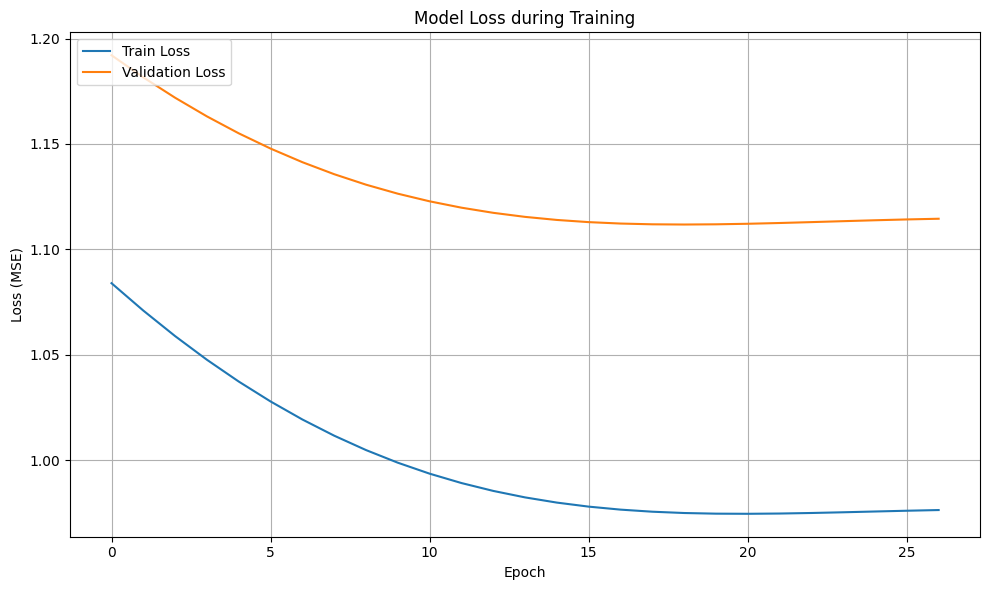

In [23]:
# --- Visualize the Loss during Training ---
plt.figure(figsize=(10, 6))

plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Model Loss during Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

## Regression Surface / Regression Hypersurface


--- Visualizing Regression Prediction Surface ---


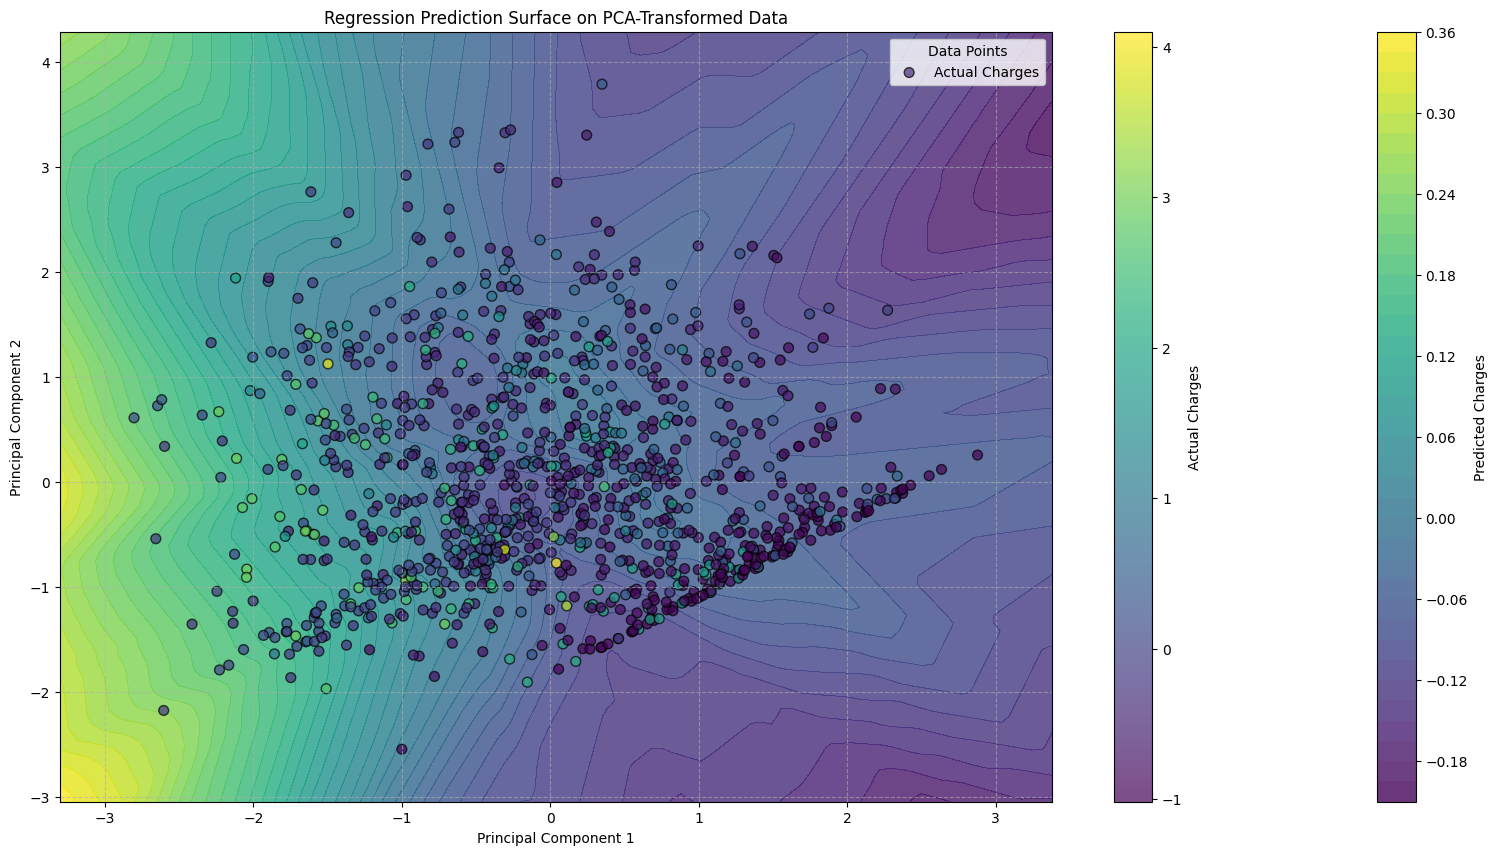

In [24]:
# --- Visualize the Regression Prediction Surface ---
# This replaces the "Decision Boundary" plot for classification
print("\n--- Visualizing Regression Prediction Surface ---")

# Create a meshgrid over the 2D PCA feature space
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)

plt.figure(figsize=(20, 10))

# Plot the predicted values as a filled contour map
contour = plt.contourf(xx, yy, Z_predicted, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Predicted Charges')

# Overlay the actual training data points, colored by their true charges
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Actual Charges')
plt.colorbar(scatter, label='Actual Charges')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Regression Prediction Surface on PCA-Transformed Data")
plt.legend(title="Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Regression Surface / Regression Hypersurface (3D)


--- Visualizing Regression Prediction Surface (3D) ---


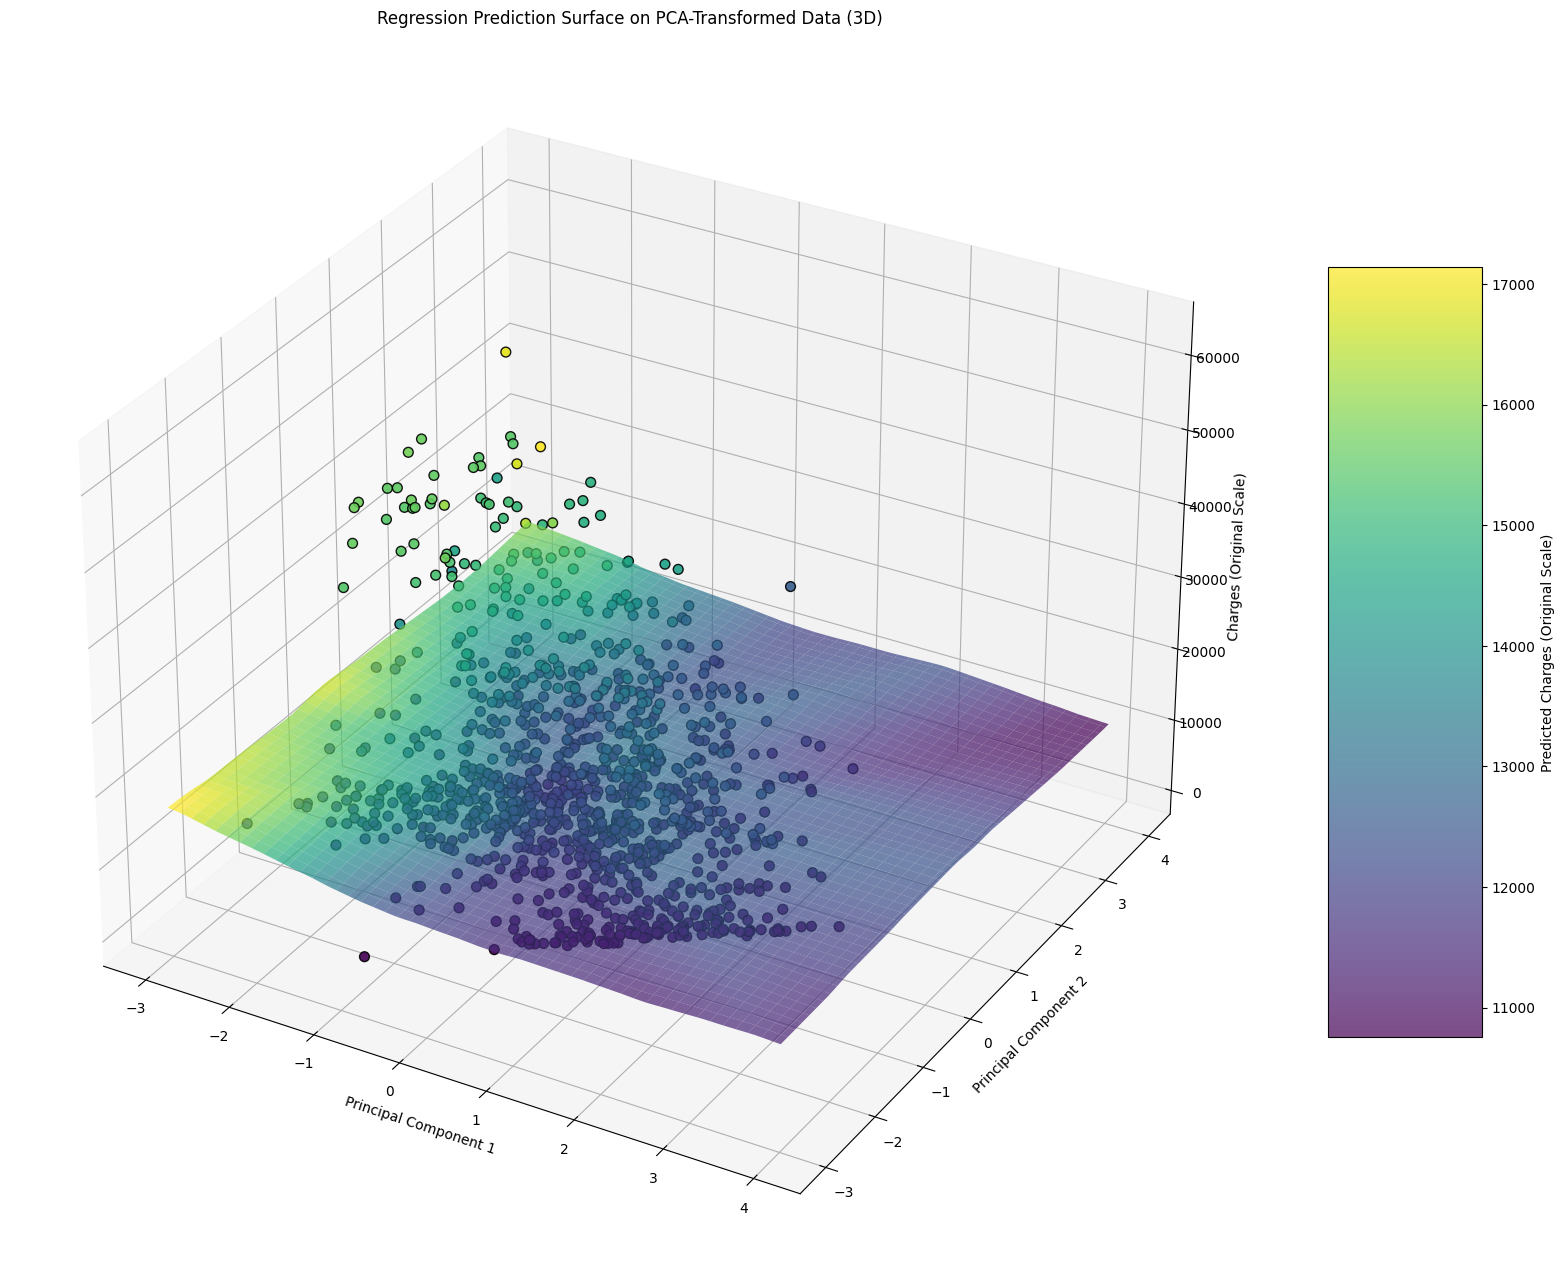

In [25]:
# --- Visualize the Regression Prediction Surface (3D) ---
print("\n--- Visualizing Regression Prediction Surface (3D) ---")

# Create a meshgrid over the 2D PCA feature space with range matching the reference image (-3 to 4)
x_min, x_max = -3.0, 4.0  # Adjusted to match the reference image range
y_min, y_max = -3.0, 4.0  # Adjusted to match the reference image range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted_scaled = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)
# Inverse transform the predicted Z values to original scale for plotting
Z_predicted = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).reshape(xx.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Plot the predicted values as a surface
surface = ax.plot_surface(xx, yy, Z_predicted, cmap='viridis', alpha=0.7)
fig.colorbar(surface, shrink=0.5, aspect=5, label='Predicted Charges (Original Scale)')

# Overlay the actual training data points, colored by their true charges (original scale)
y_train_original_scale = y_scaler.inverse_transform(y_train_tensor.cpu().numpy().reshape(-1, 1)).flatten()
ax.scatter(x_train[:, 0], x_train[:, 1], y_train_original_scale, c=y_train_original_scale, cmap='viridis', edgecolors='k', s=50, alpha=0.9, label='Actual Charges')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Charges (Original Scale)") # Z-axis label for regression output
ax.set_title("Regression Prediction Surface on PCA-Transformed Data (3D)")
# ax.legend() # Legend might not work well in 3D; consider manual labeling if needed
plt.show()

# Model Evaluation

In [26]:
# --- Metrics Calculation for Regression ---
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred_test_output_tensor = model(x_test_tensor)
y_pred_test_output_scaled = y_pred_test_output_tensor.cpu().numpy().flatten()
# Inverse transform the scaled predictions back to original scale
y_pred_test_output = y_scaler.inverse_transform(y_pred_test_output_scaled.reshape(-1, 1)).flatten()

# Use the original y_test values (not y_test_raw, which is undefined here)
# y_test is the scaled target, inverse transform it as well for comparison
y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

mse = mean_squared_error(y_test_original, y_pred_test_output)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_test_output)

print(f"\n--- Regression Metrics on Test Data ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print("-" * 30)


--- Regression Metrics on Test Data ---
Mean Squared Error (MSE): 150505676.8294
Root Mean Squared Error (RMSE): 12268.0755
R-squared (R2): 0.0306
------------------------------


## Regression Surface / Regression Hypersurface on test dataset


--- Visualizing Regression Prediction Surface ---


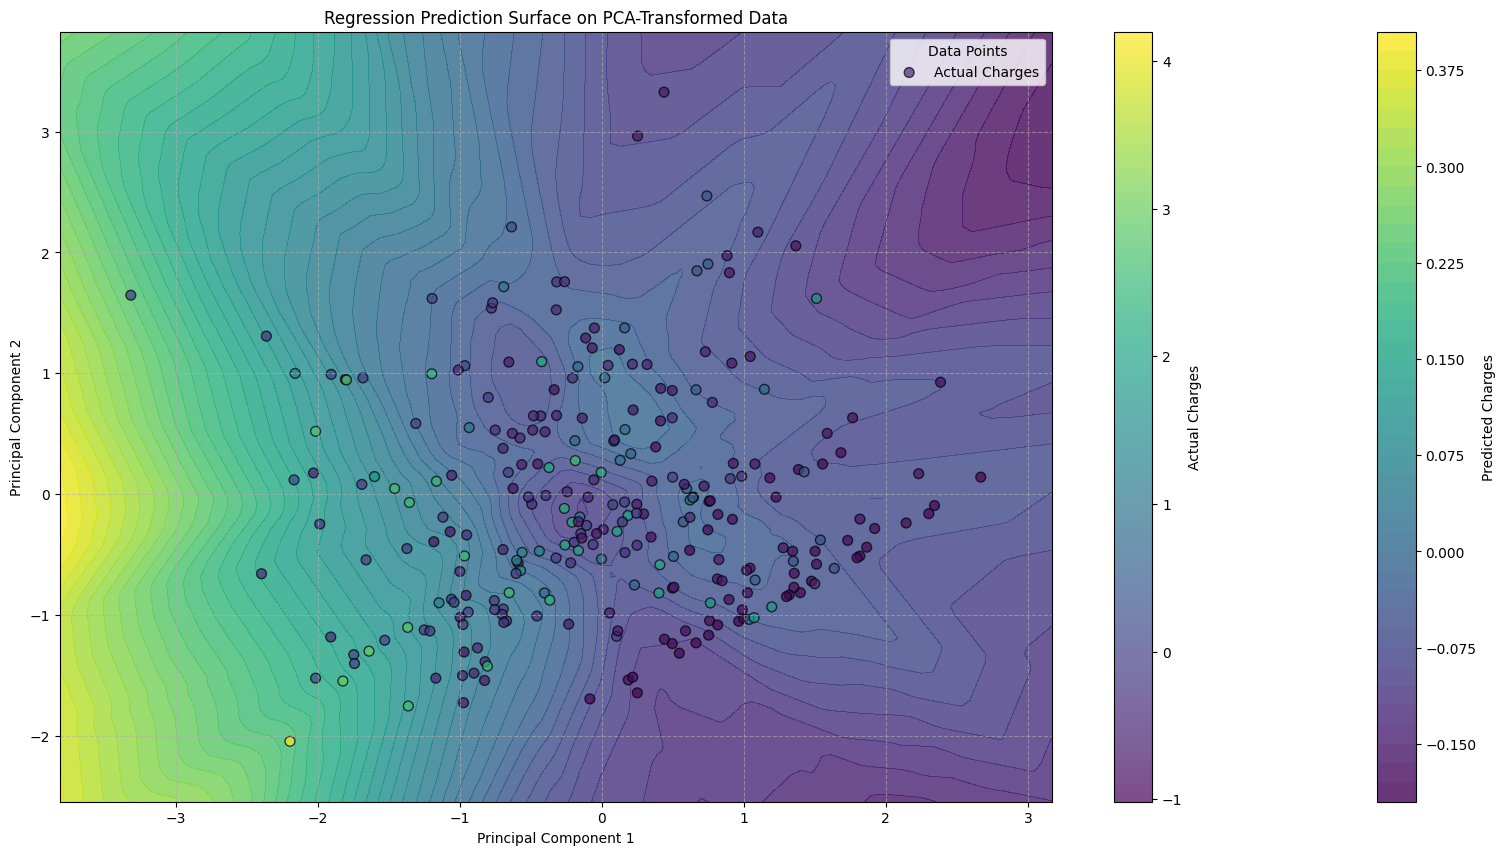

In [27]:
# --- Visualize the Regression Prediction Surface ---
# This replaces the "Decision Boundary" plot for classification
print("\n--- Visualizing Regression Prediction Surface ---")

# Create a meshgrid over the 2D PCA feature space
x_min, x_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
y_min, y_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)

plt.figure(figsize=(20, 10))

# Plot the predicted values as a filled contour map
contour = plt.contourf(xx, yy, Z_predicted, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Predicted Charges')

# Overlay the actual training data points, colored by their true charges
scatter = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Actual Charges')
plt.colorbar(scatter, label='Actual Charges')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Regression Prediction Surface on PCA-Transformed Data")
plt.legend(title="Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Regression Surface / Regression Hypersurface (3D) on test dataset


--- Visualizing Regression Prediction Surface (3D) ---


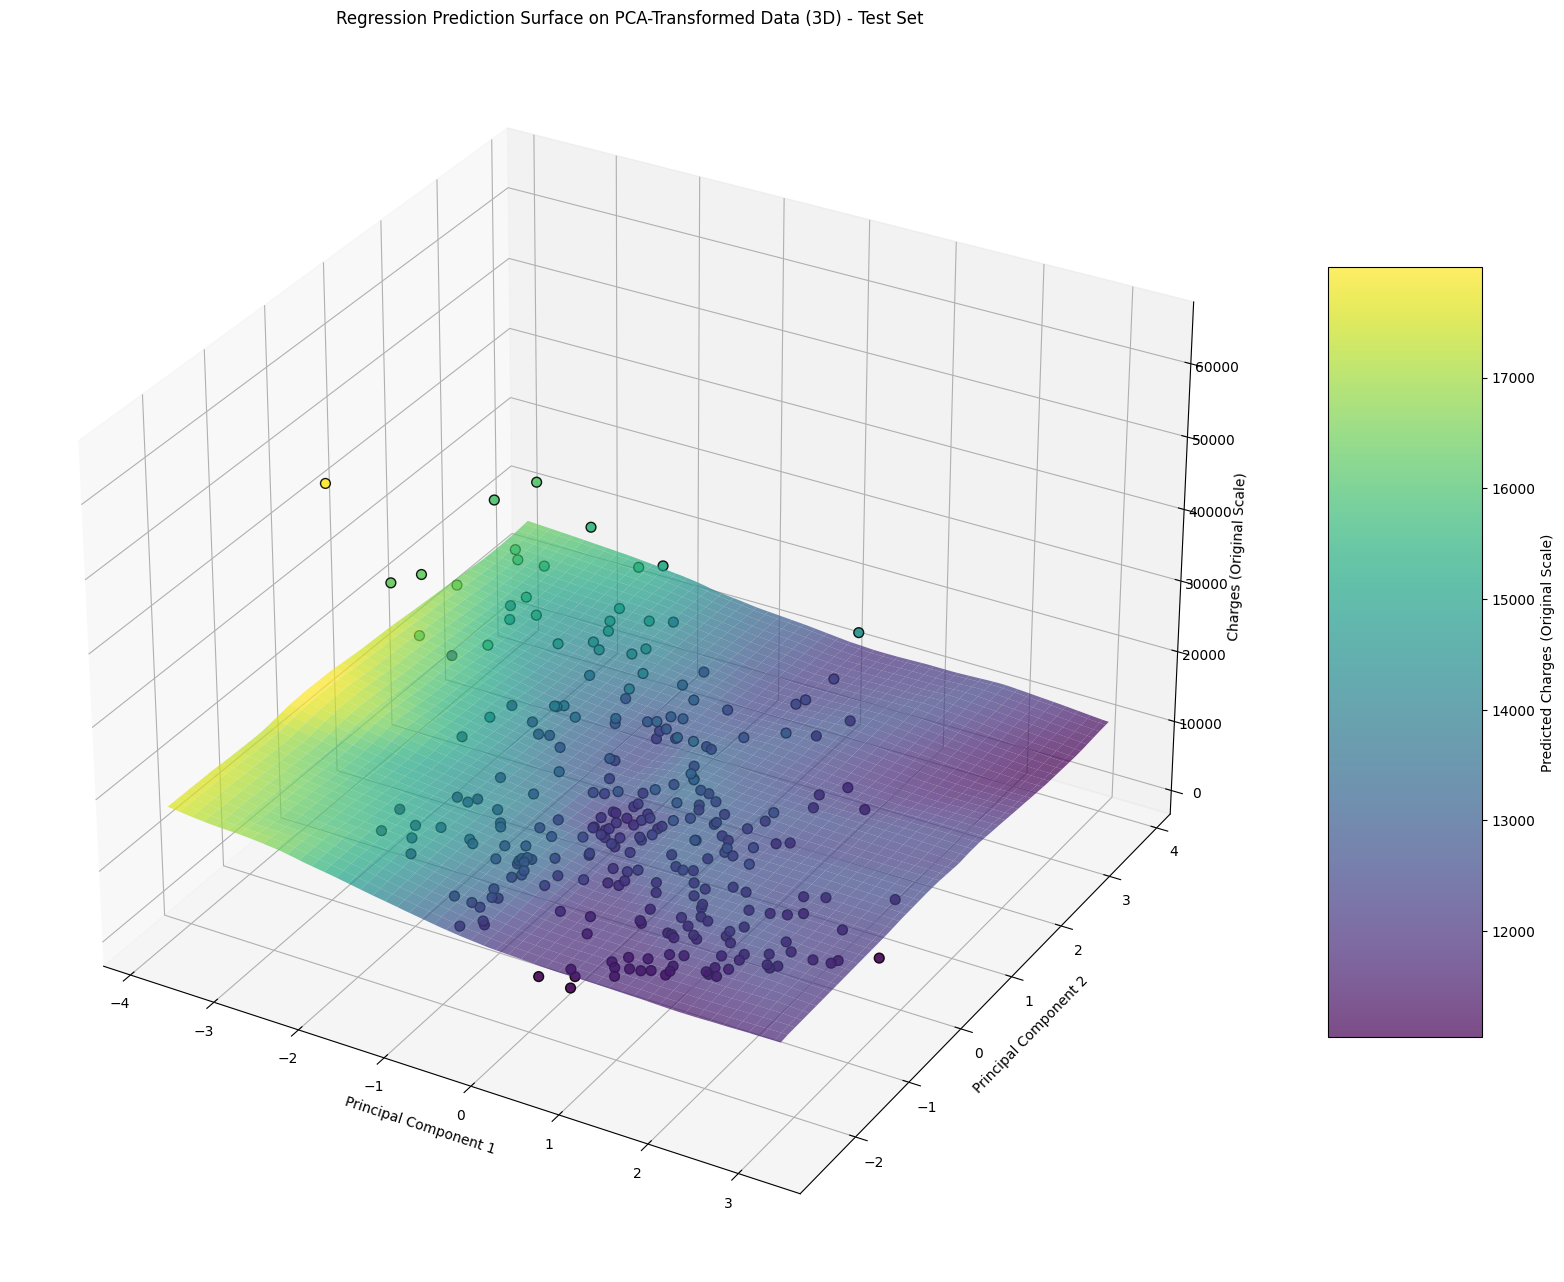

In [28]:
# --- Visualize the Regression Prediction Surface (3D) ---
print("\n--- Visualizing Regression Prediction Surface (3D) ---")

# Create a meshgrid over the 2D PCA feature space based on x_test
x_min, x_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
y_min, y_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for PyTorch model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
meshgrid_tensor = torch.tensor(meshgrid_points, dtype=torch.float32)

# Get continuous predictions from the model
model.eval()
with torch.no_grad():
    Z_predicted_tensor = model(meshgrid_tensor)
Z_predicted_scaled = Z_predicted_tensor.cpu().numpy().reshape(xx.shape)
# Inverse transform the predicted Z values to original scale for plotting
Z_predicted = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).reshape(xx.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Plot the predicted values as a surface
surface = ax.plot_surface(xx, yy, Z_predicted, cmap='viridis', alpha=0.7)
fig.colorbar(surface, shrink=0.5, aspect=5, label='Predicted Charges (Original Scale)')

# Overlay the actual test data points, colored by their true charges (original scale)
# Ensure y_test_tensor is defined (e.g., y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1))
ax.scatter(x_test[:, 0], x_test[:, 1], y_test_original, c=y_test_original, cmap='viridis', edgecolors='k', s=50, alpha=0.9, label='Actual Charges')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Charges (Original Scale)") # Z-axis label for regression output
ax.set_title("Regression Prediction Surface on PCA-Transformed Data (3D) - Test Set")
# ax.legend() # Legend might not work well in 3D; consider manual labeling if needed
plt.show()